<a href="https://colab.research.google.com/github/08006679uhi/08006679_DAOW/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The roads of New York City witness thousands of traffic accidents every year, causing fatalities, injuries, and significant traffic congestion. Emergency services in the city have tasked us with investigating the relationship between weather conditions and the number of traffic collisions on a particular day.

The impact of weather conditions on traffic accidents cannot be overstated. It affects visibility, road conditions, and driver behavior, leading to increased risk of accidents. For instance, heavy rain, snow, or fog can reduce visibility and make the roads slippery, leading to a higher probability of accidents. High temperatures and humidity levels can affect drivers' physical and mental abilities, leading to impaired driving. Conversely, clear skies and mild temperatures may lead to a higher number of drivers on the roads, potentially increasing the number of accidents.

In this analysis, we will use daily weather data for New York City from 2016 to 2019, obtained from the National Oceanic and Atmospheric Administration (NOAA). Our primary objective is to investigate how different weather conditions are associated with the number of traffic accidents on a specific day of the week. We will focus on the following variables: day of the week, temperature, dew point, visibility, wind speed, precipitation, and snow depth.

The results of this analysis can provide valuable insights for emergency services in New York City to better prepare for weather-related accidents and improve their response times. Additionally, our findings may help drivers and pedestrians be more cautious during certain weather conditions, reducing the number of accidents and improving road safety overall.

Our analysis will focus on the relationship between weather conditions and traffic accidents. To do so, we will extract data from the dataset that pertains to traffic accidents. We will then group this data by day of the week and examine how the different weather conditions affect the number of accidents. By using regression analysis, we will create a predictive model that will help us estimate the number of accidents on a given day based on the weather conditions.

In conclusion, this analysis aims to investigate the relationship between weather conditions and the number of traffic accidents in New York City. By using daily weather data from 2016 to 2019, we will explore the relationship between different weather conditions and the number of accidents on the day these weather conditions were present.

# **Methodologies**

**Data Collection**

The dataset we will be using for this analysis is the NYC Motor Vehicle Crashes dataset, which can be found at the following link: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95. This dataset includes information about motor vehicle collisions that were reported to the New York City Police Department (NYPD) from 2012 to the present day.

We will be using a preprocessed version of this dataset, which has been cleaned and filtered to include only the relevant columns for this analysis. The dataset can be found at the following link: https://raw.githubusercontent.com/08006679uhi/08006679_DAOW/main/bquxjob_181230e_1872e13b261.csv.

To load the dataset into R, we can use the read.csv() function:

In [2]:
collision_data <- read.csv("https://raw.githubusercontent.com/08006679uhi/08006679_DAOW/main/bquxjob_181230e_1872e13b261.csv")

Now that we have loaded the dataset, let's take a closer look at its structure:

In [ ]:
str(collision_data)

'data.frame':	3106 obs. of  18 variables:
 $ day           : int  7 4 2 3 4 4 2 4 1 1 ...
 $ year          : int  2018 2018 2013 2012 2012 2012 2017 2020 2012 2014 ...
 $ mo            : int  9 12 11 7 7 8 9 9 9 11 ...
 $ da            : int  23 20 5 11 12 9 26 10 17 10 ...
 $ collision_date: chr  "2018-09-23" "2018-12-20" "2013-11-05" "2012-07-11" ...
 $ temp          : num  59.8 38.6 43.5 77.1 77.4 78.2 65.9 70.8 66.5 48.2 ...
 $ dewp          : num  50.2 34.4 30.4 62 60.2 69.6 65.3 69.5 48 42.2 ...
 $ slp           : num  1023 1020 1038 1020 1022 ...
 $ visib         : num  10 9.6 10 10 10 9.3 2.6 0.8 10 9.6 ...
 $ wdsp          : num  3 5 3.9 1.9 2.3 2.3 3.4 4.4 2.2 4 ...
 $ mxpsd         : num  5.1 7 7 7 7 7 7 7 7 7 ...
 $ gust          : num  1000 1000 1000 1000 1000 ...
 $ max           : num  78.1 48 50 84 88 88 77 77 77 59 ...
 $ min           : num  53.1 21 37.9 64.9 57 61 59 66.9 48.2 39 ...
 $ prcp          : num  0 0 0 0 0 0 0.12 0 0 0 ...
 $ sndp          : num  1000 1000

In [ ]:
summary(collision_data)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date          temp            dewp               slp       
 Length:3106        Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 Class :character   1st Qu.:41.20   1st Qu.:   32.60   1st Qu.: 1012  
 Mode  :character   Median :52.50   Median :   45.70   Median : 1017  
                    Mean   :52.25   Mean   :   47.88   Mean   : 1023  
                    3rd Qu.:64.70   3rd Qu.:   59.10   3rd Qu.: 1022  
                    Max.   :86.70   Max.   : 9999.90   Max.   :10000  
     visib             wdsp           mxpsd     

In [ ]:
head(collision_data)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,999.9,78.1,53.1,0,999.9,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,999.9,48.0,21.0,0,999.9,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,999.9,50.0,37.9,0,999.9,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,999.9,84.0,64.9,0,999.9,0,565
5,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,999.9,88.0,57.0,0,999.9,0,577
6,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0,999.9,0,581


As we can see, the dataset contains 3106  observations (rows) and 18 variables (columns). Here's a brief description of each variable:

    day: Day of the week (1 = Monday, 2 = Tuesday, etc.)
    year: Year of collision
    mo: Month of the year (1 = January, 2 = February, etc.)
    da: Day of the month
    collision_date: Full date of collision
    temp: Temperature in degrees Fahrenheit
    dewp: Dew point in degrees Fahrenheit
    slp: Mean sea level pressure for the day in millibars
    visib: Visibility in miles
    wdsp: Mean wind speed for the day in knots
    mxpsd: Maximum sustained wind speed reported for the day
    gust:Maximum wind gust reported for the day in knots 
    max: Maximum temperature reported during the day in Fahrenheit
    min:Minimum temperature reported during the day in Fahrenheit
    prcp:Total precipitation (rain and/or melted snow) reported during the day in inches
    sndp:Snow depth in inches
    fog: Yes/No indicator if fog was reported
    NUM_COLLISIONS: Number of collisions

In [ ]:
collision_data <- collision_data %>%
  mutate(temp = if_else(is.na(temp), mean(temp, na.rm = TRUE), temp),
         dewp = if_else(is.na(dewp), mean(dewp, na.rm = TRUE), dewp),
         visib = if_else(is.na(visib), mean(visib, na.rm = TRUE), visib),
         wdsp = if_else(is.na(wdsp), mean(wdsp, na.rm = TRUE), wdsp),
         mxpsd = if_else(is.na(mxpsd), mean(mxpsd, na.rm = TRUE), mxpsd),
         max = if_else(is.na(max), mean(max, na.rm = TRUE), max),
         min = if_else(is.na(min), mean(min, na.rm = TRUE), min))

**Statistical Methods**

To explore the relationship between weather and traffic collisions, we will use various statistical methods, including visualization, correlation analysis, and regression analysis. First, let's take a look at the distribution of the target variable, the number of collisions, using a histogram:

In [ ]:
library(ggplot2)

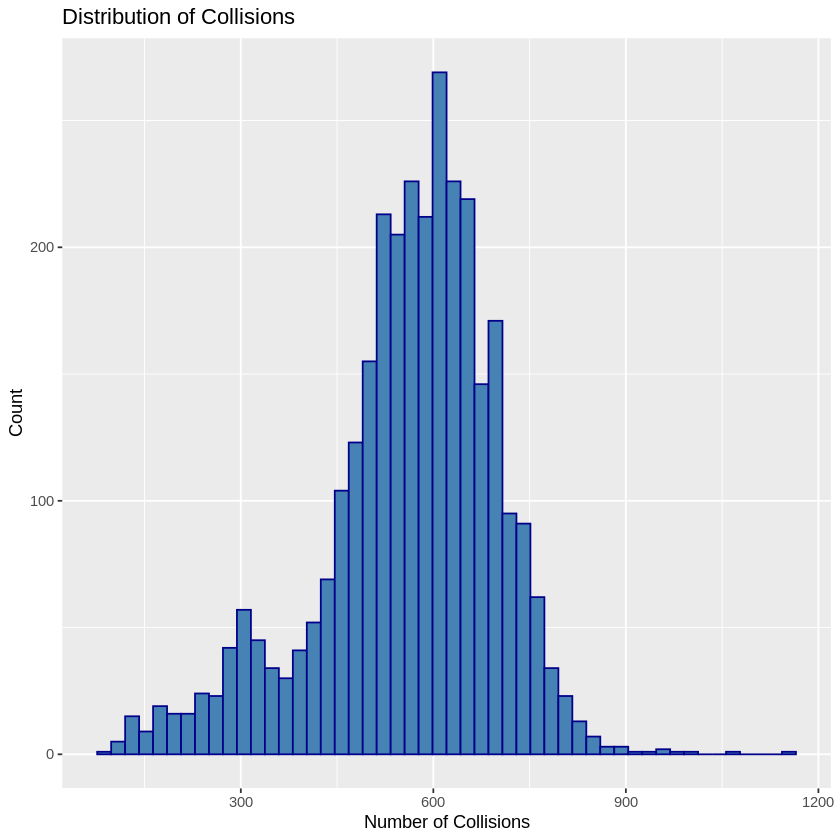

In [ ]:
ggplot( data = collision_data, aes(x = NUM_COLLISIONS)) +
  geom_histogram(fill = "steelblue", color = "darkblue", bins = 50) +
  labs(title = "Distribution of Collisions",
       x = "Number of Collisions",
       y = "Count")

The histogram shows that the distribution of the number of collisions is right-skewed, with the majority of days having relatively few collisions and a small proportion of days having a large number of collisions.

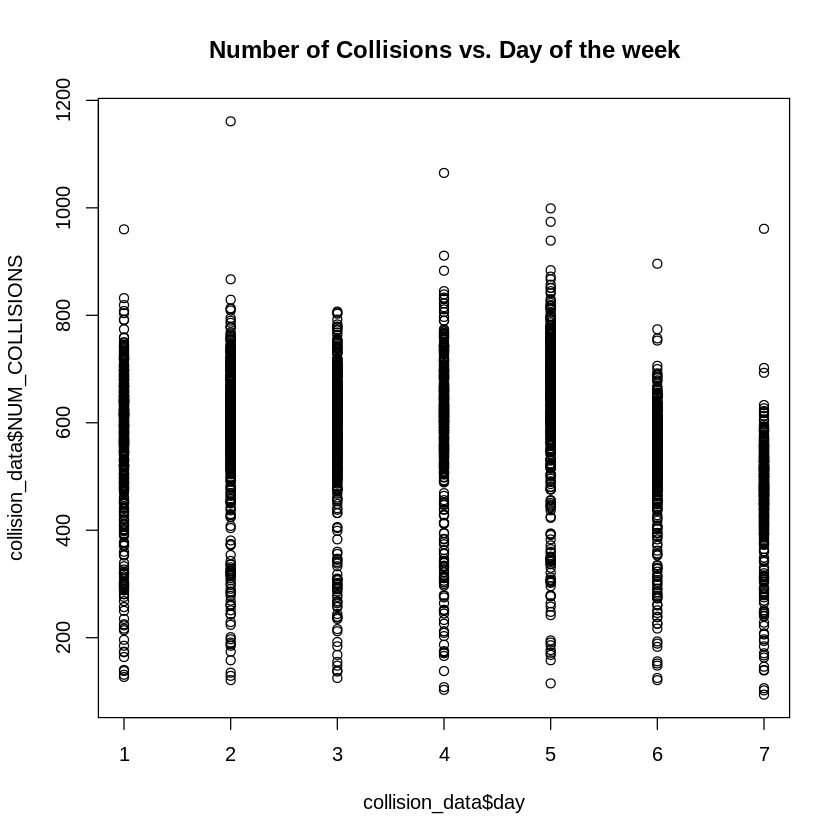

In [ ]:
plot(collision_data$day, collision_data$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week")

Looking at the above plot, we can see that Saturdays and sundays are the lowest days for collisions, this is presumably due to less commuting traffic, less commercial traffic and less industrial traffic on the roads on the weekend.

Thursday and Friday have the two highest rates of collisions in the week, we could potentially put this down to their place at the end of the working week, and so fatigue, impatience and end of week deadlines maybe cause more reckless driving and therefore more collisions on those days.

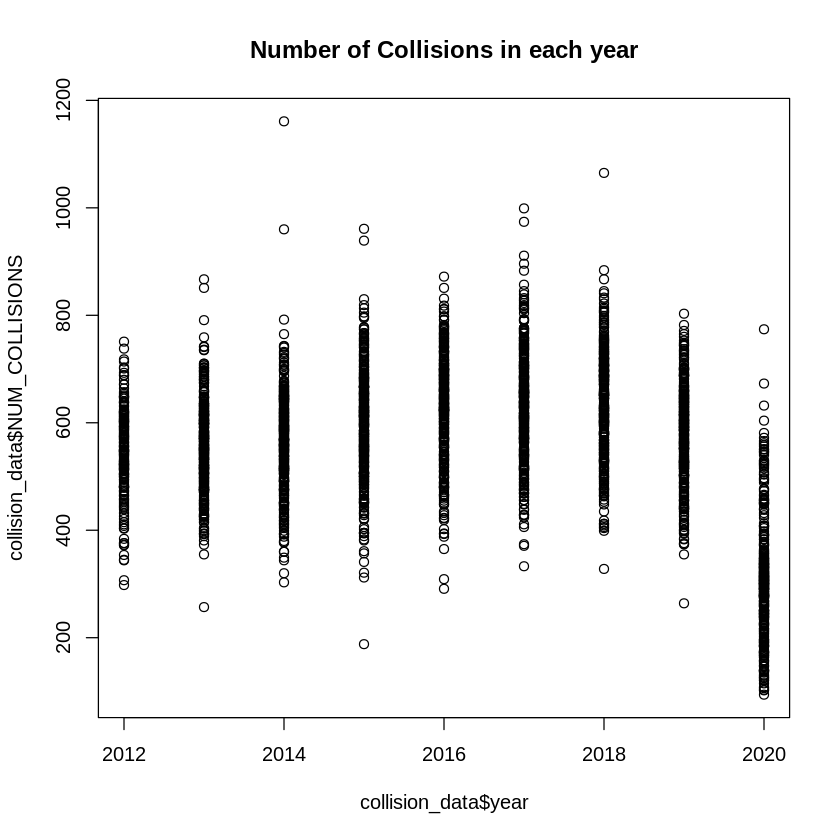

In [ ]:
plot(collision_data$year, collision_data$NUM_COLLISIONS, main="Number of Collisions in each year")     

While this is perhaps not a comparison which we could draw as many conclusions from, it is still an interesting visualisation which is worth considering. 

As we can see, collisions were on a general upward trend from 2014 onwards until 2019, whith 2020 being exceptionally low. The one conclusion in this graph that seems safe to make is that the drop in collisions in 2019 and 2020 was due to covid forcing more people to stay at home and therefore the huge drop in traffic on the roads will account for the change in pattern.

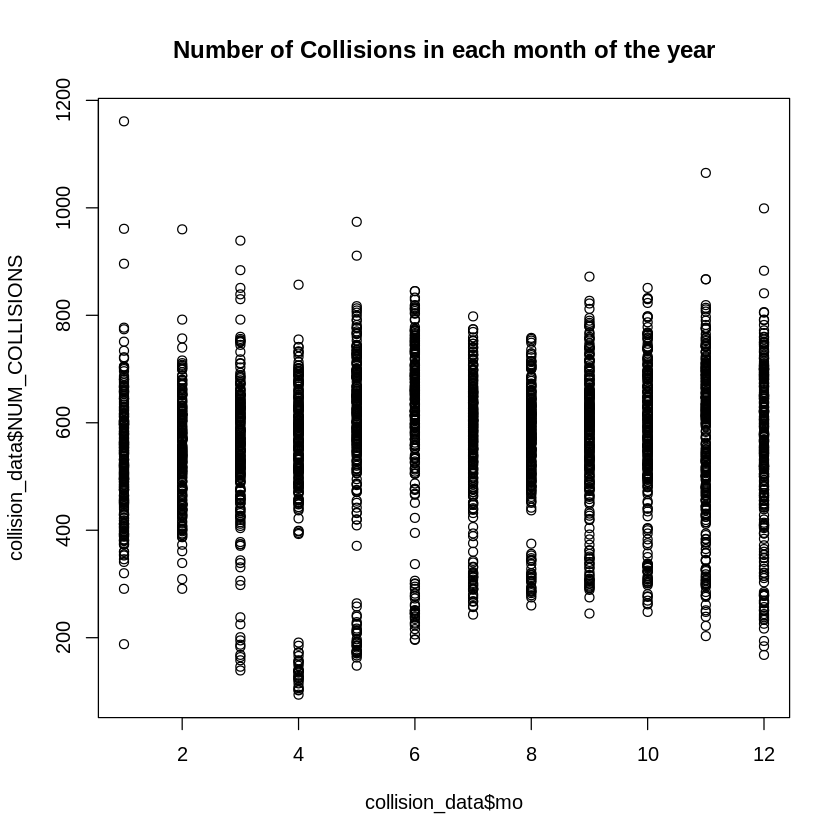

In [ ]:
plot(collision_data$mo, collision_data$NUM_COLLISIONS, main="Number of Collisions in each month of the year")

Our final visualisation of collisions based on when they occured is shown above, displayed the number of collisions in each month of the year. 

We have minimal conclusions we can draw from this graph, seeing as how summer months (with higher temperatures) are inconsistent in their range of collisions, and even winter months (with more hazardous road surfaces) do not provide any significant conclusions.

Next, let's explore the relationships between the weather variables and the number of collisions using correlation analysis. We will calculate the correlation coefficients between each weather variable and the number of collisions using the cor() function:

In [ ]:
cor(collision_data[,c("NUM_COLLISIONS", "temp", "dewp", "visib", "wdsp", "mxpsd", "prcp", "sndp")])

,NUM_COLLISIONS,temp,dewp,visib,wdsp,mxpsd,prcp,sndp
NUM_COLLISIONS,1.000000000,0.07496180,0.015635036,-0.03989105,-0.008025338,0.021088220,-0.018122157,-0.016506824
temp,0.074961805,1.00000000,0.099363272,-0.20382645,-0.349153398,-0.048826402,0.088826722,0.011274382
dewp,0.015635036,0.09936327,1.000000000,-0.04596396,-0.044492621,-0.005839782,0.006776660,0.002208858
visib,-0.039891049,-0.20382645,-0.045963963,1.00000000,-0.118344829,-0.022151090,-0.038085907,-0.012214391
wdsp,-0.008025338,-0.34915340,-0.044492621,-0.11834483,1.000000000,0.136312249,0.017550491,0.002991616
mxpsd,0.021088220,-0.04882640,-0.005839782,-0.02215109,0.136312249,1.000000000,0.002536092,-0.007403344
prcp,-0.018122157,0.08882672,0.006776660,-0.03808591,0.017550491,0.002536092,1.000000000,0.001482703
sndp,-0.016506824,0.01127438,0.002208858,-0.01221439,0.002991616,-0.007403344,0.001482703,1.000000000


The results show that the temperature (temp) has the strongest positive correlation with the number of collisions, followed by the dew point (dewp) and the maximum sustained wind speed (mxpsd). The visibility (visib) has a weak negative correlation with the number of collisions.

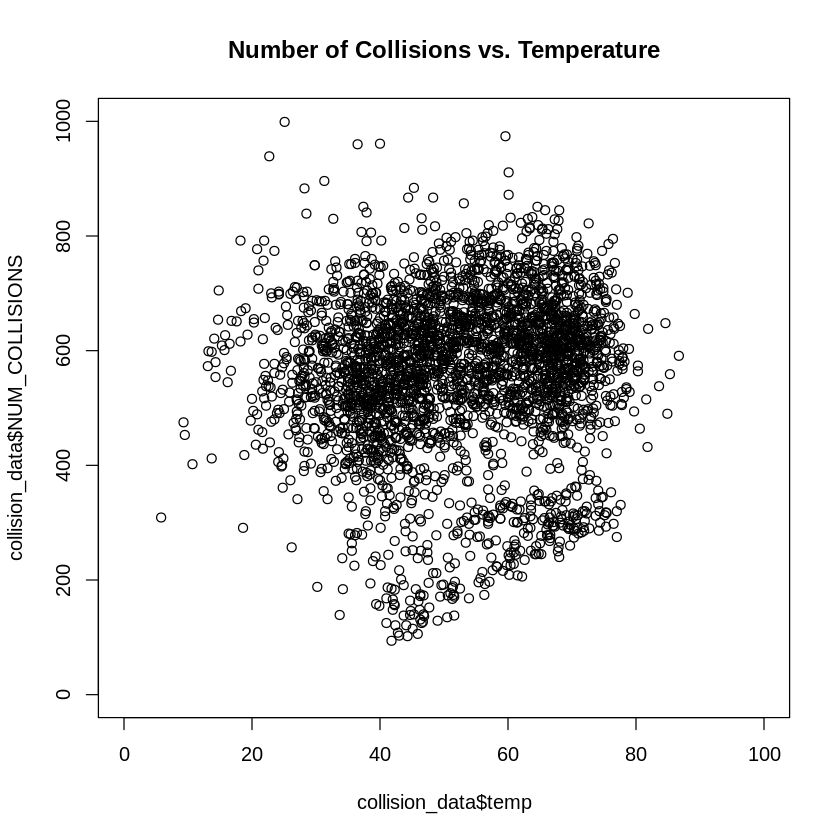

In [ ]:
plot(collision_data$temp, collision_data$NUM_COLLISIONS, main="Number of Collisions vs. Temperature", xlim=c(0,100), ylim=c(0,1000))

In [ ]:
cor(collision_data$temp, collision_data$NUM_COLLISIONS)

[1] 0.0749618

As we can see above, the visual comparison of Temperature vs Number of collisions appears to have a positive correlation, as supported by our previous analysis of the data.

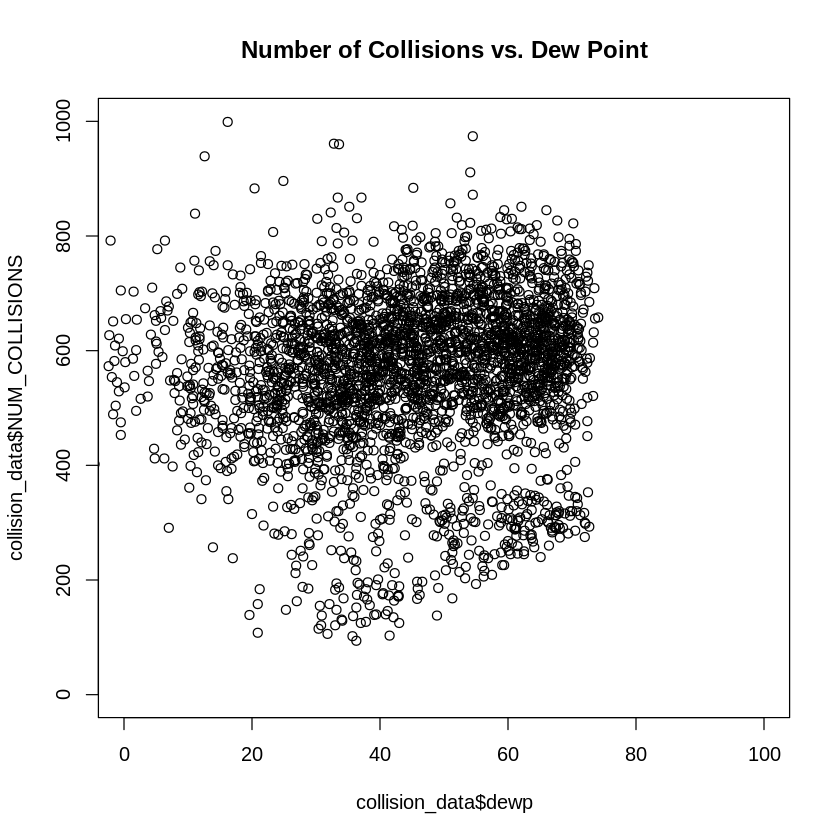

In [ ]:
plot(collision_data$dewp, collision_data$NUM_COLLISIONS, main="Number of Collisions vs. Dew Point", xlim=c(0,100), ylim=c(0,1000))

In [ ]:
cor(collision_data$dewp, collision_data$NUM_COLLISIONS)

[1] 0.01563504

As with temperature, dew point has a positive correlation with the number of collisions in a given day. It is noticeabley lower, but still a positive correlation worth considering.

Because dew point is a measurement of the temperature at which air is saturated with water vapor and is considered a more accurate representation of humidity than relative humidity, we can assume that the effect of dew point on traffic collisions comes from drivers feeling more uncomfortable, impatient and have lower concentration levels. These are the factors then then go on to increase collision numbers.

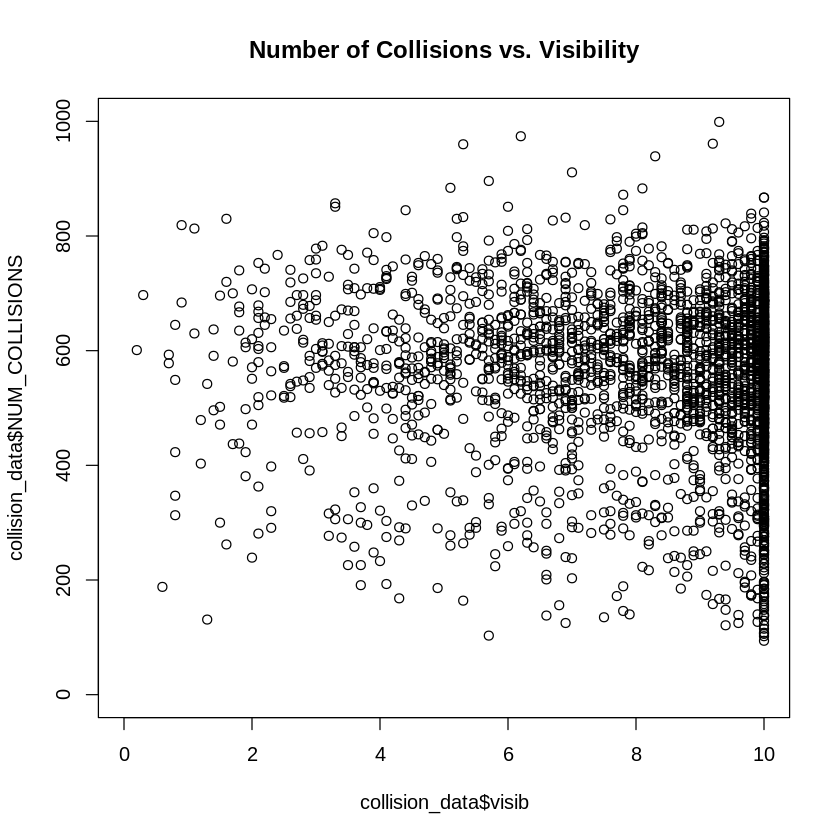

In [ ]:
plot(collision_data$visib, collision_data$NUM_COLLISIONS, main="Number of Collisions vs. Visibility", xlim=c(0,10), ylim=c(0,1000))

In [ ]:
cor(collision_data$visib, collision_data$NUM_COLLISIONS)

[1] -0.03989105

Converse two our previous two variables analysed, visibility has a negative correlation with the number of collisions. The negative correlation is greater than the positive correlation of dew point, but lower than that of temperature.

So, as visibility increases, the number of collisions decreases. This is what would be generally assumed to be the case, as greater visibility will provide road users with greater awareness of other vehicles on the road and view of any upcoming obstacles.

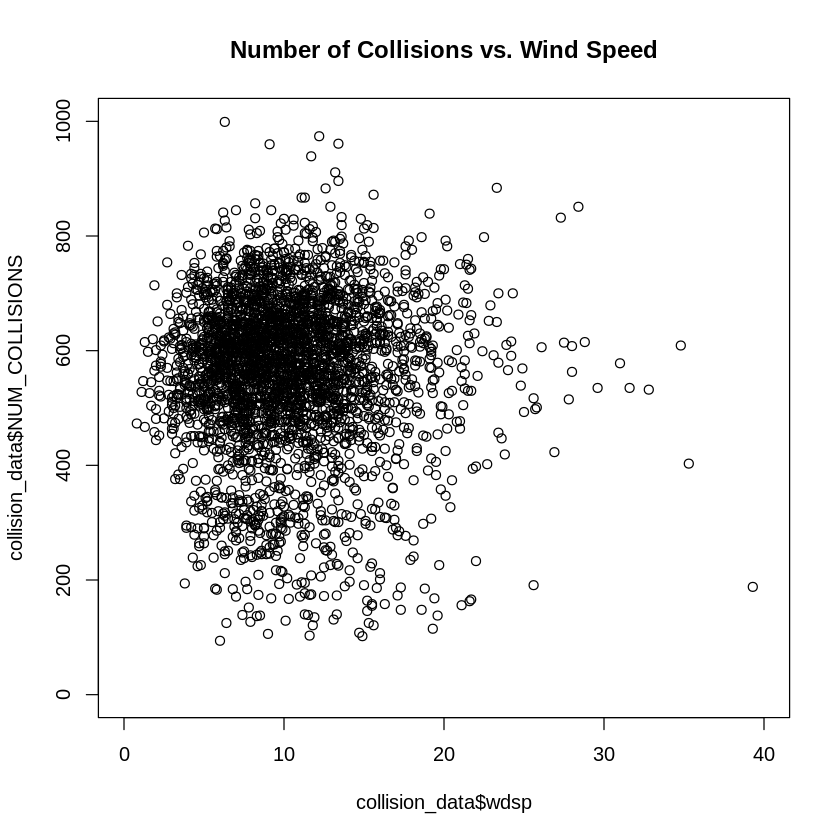

In [ ]:
plot(collision_data$wdsp, collision_data$NUM_COLLISIONS, main="Number of Collisions vs. Wind Speed", xlim=c(0,40), ylim=c(0,1000))

In [ ]:
cor(collision_data$wdsp, collision_data$NUM_COLLISIONS)

[1] -0.008025338

Wind speed has a very weak negative correlation with the number of collisions, so it will not be a variable we will be considering as particularly important throughout our analysis.

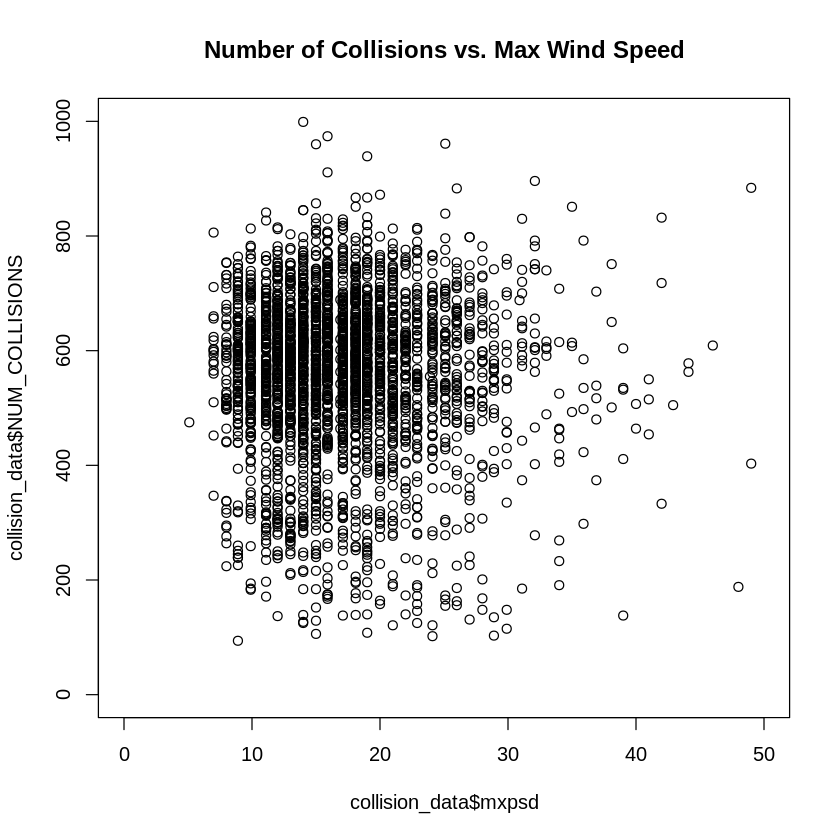

In [ ]:
plot(collision_data$mxpsd, collision_data$NUM_COLLISIONS, main="Number of Collisions vs. Max Wind Speed", xlim=c(0,50), ylim=c(0,1000))

In [ ]:
cor(collision_data$mxpsd, collision_data$NUM_COLLISIONS)

[1] 0.02108822

Max Wind Speed shows a positive correlation and one of the most significant positive correlation so far, so we will consider it important throughout our analysis.

The impact of max wind speed on collisions is likely due to the effect it has on the control a driver has on their vehicle, as well as the increase of obstacles and debris on the road.

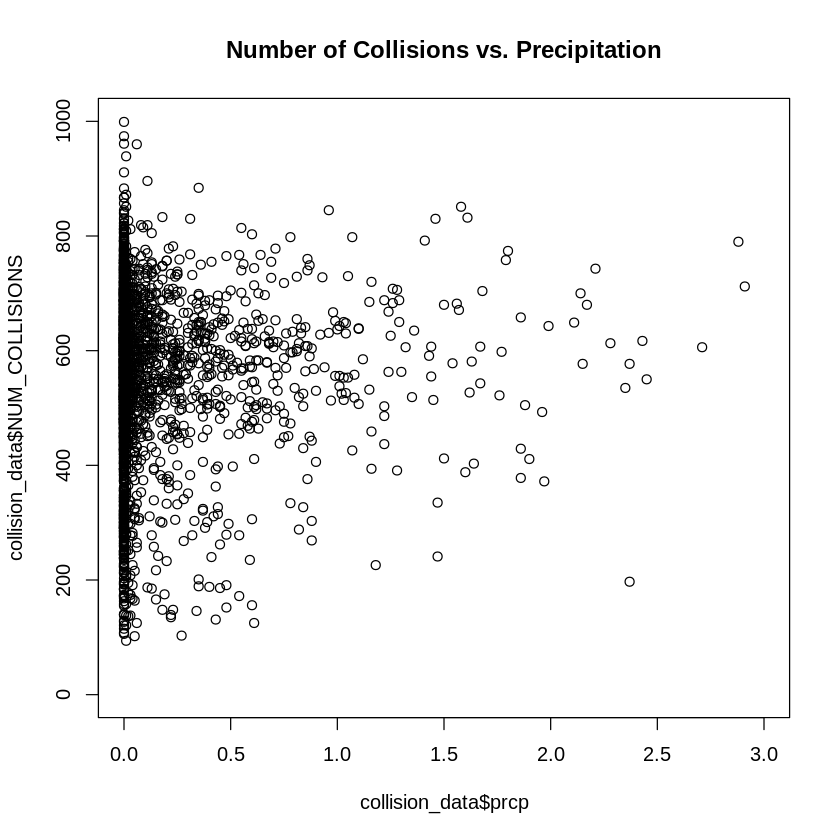

In [ ]:
plot(collision_data$prcp, collision_data$NUM_COLLISIONS, main="Number of Collisions vs. Precipitation", xlim=c(0,3), ylim=c(0,1000))

In [ ]:
cor(collision_data$prcp, collision_data$NUM_COLLISIONS)

[1] -0.01812216

Precpitation has a negative correlation against the number of collisions, lower than our current strongest negative correlation but still significant enough for us to consdier important in our analysis.

Precpitation is one of our variables most expected to cause an increase in collisions, due to higher rain causing poorer vehicle control, greater braking distances and reduced visibility. All of these combined would cause significant issues for road users, as therefore increase traffic collisions.

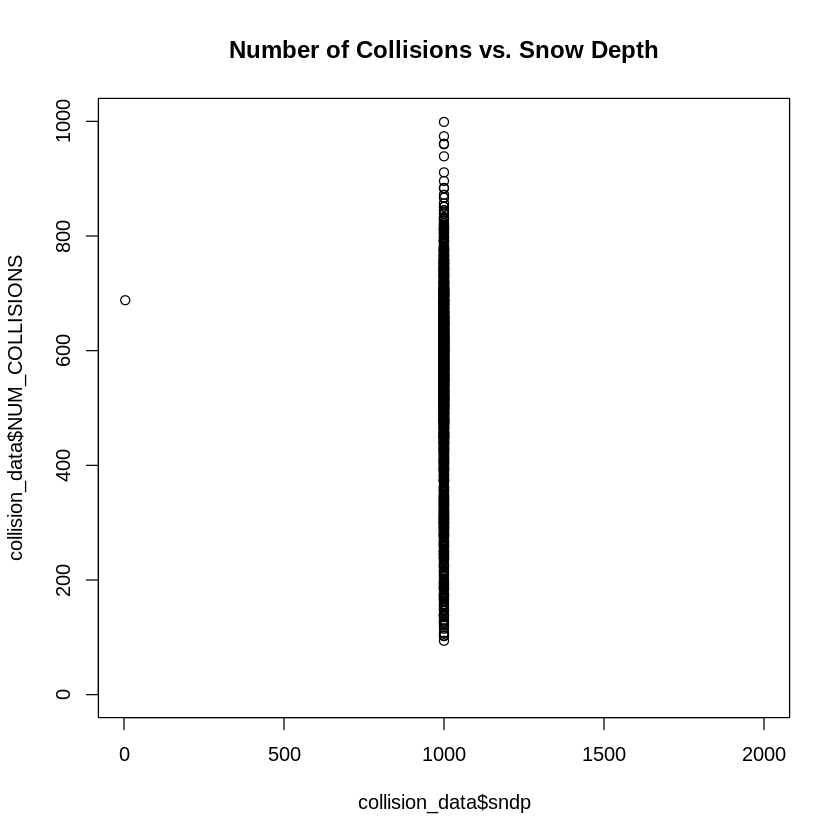

In [ ]:
plot(collision_data$sndp, collision_data$NUM_COLLISIONS, main="Number of Collisions vs. Snow Depth", xlim=c(0,2000), ylim=c(0,1000))

In [ ]:
cor(collision_data$sndp, collision_data$NUM_COLLISIONS)

[1] -0.01650682

Snow depth data appears to be incomplete or incorrect, so this is a variable that we will ignore in our analysis.

As it stands, temperature is our best variable for estimating the number of collisions in a day. This is a reasonable hypothesis with the assumption that increased temperatures would cause reduced response times, lower focus, more instances of "road rage" as well as more cars on the road. 

#Results

Our analysis has garnered some very interesting and useful outcomes. We have got 5 weather related variables with a notable correlation with the number of collisions on the day with the weather effect.

Below is a chart showing the comparison of our variables, showing us how clearly temperature is the both the most relevant positive variable and the most relevant overall variable. Each variable we have shown in the chart has been analysed and we have decided that these are the most relevant variables we have available.

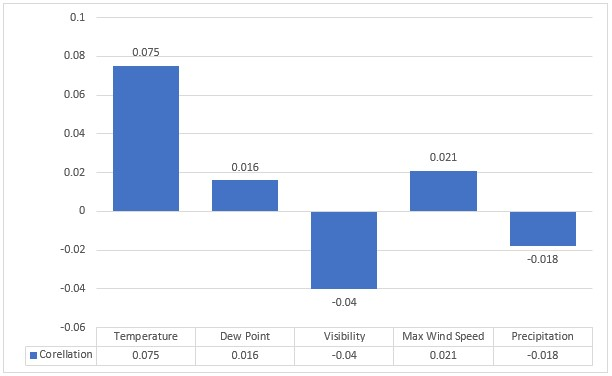

We can see that the most dangerous day for traffic collisions is a warm, low visibility, windy and dry day. This is perhaps contrary to what would be assumed to be more dangerous, while hot and windy weather are considered to be hazardous weather, precipitation having a negative correlation is unexpected due to rain, ice and snow also being considered hazardous according to the UK Highway Code (gov.uk, 2022)

If we consider the type of day we have discussed as the more likely day to have high numbers of traffic collisions, we can look at the climate of New York and make assumptions on what months are assumed to have the highest number of collisions.

Looking at the Met Office data(Met Office, 2023), June, July and August are the warmest months in New York and should be the worst months for collisions due to temperature being so significant for daily collisions. However, as we see in the chart below, although June is high, both July and August are noticeably lower even though they are the two highest temperature months.

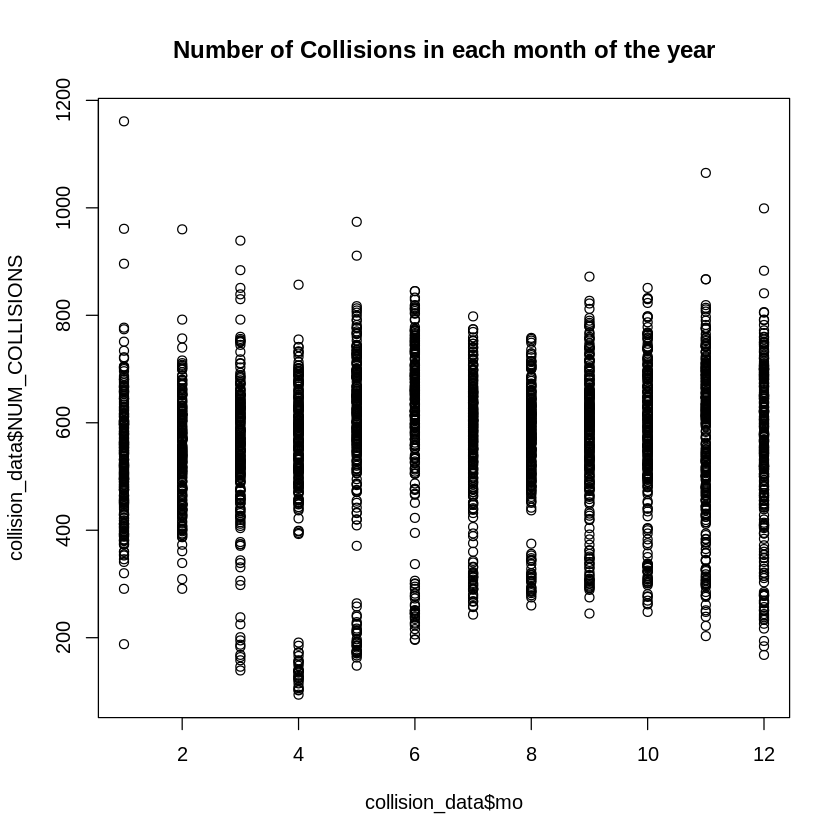

In [3]:
plot(collision_data$mo, collision_data$NUM_COLLISIONS, main="Number of Collisions in each month of the year")

The factors we can see that are potentially offsetting this trend is that wind speed is at its lowest in July and August and we saw above that wind speed is the second highest positive correlation  variable. August also has high levels of sunshine daily, which provides greater daily visibility, and this is our second strongest correlation  with collisions. 

So we can see potentially why August is the lower than June and July, but why is July (30 degrees celsius) has less collisions than June (27 degrees celsius)?

July has 97mm of rainfall compared to June's 93mm which based on our analysis would suggest June should have higher collisions, which it does. June also has 9.9mph wind speed compared to July's 9.6mph, another indicator that June would be higher.

October through to December are consistently high, even with dropping temperatures. As temperature decreases, wind speed does increase which explains some of the increased collisions. October also has the lowest rainfall of all months, which would contribute to increased collisions. 

September is a crossover point between the heat of summer, at 25 degrees celsius, as well as the increasing wind speed at 10.1mph, this combined with lower rainfall at 84mm and relatively high daily sunshine at 8 hours. This combination of significant values for most of our relevant variables accounts for its high number of collisions without any one variable being particularly high.

# Conclusion

Our outcomes discussed above will provide useful data points for the emergency services of New York City to optimise the staffing levels of the various emergency departments.

Temperature is the most important weather variable when looking at increased collisions, with hotter days having generally more collisions. Higher max wind speed and dew point are also significant factors when considering the effect of weather on collisons, whereas reduced visibility and lower precipitation both increase collisions.

The only surprise here is the negative correlation between precipitation and collisions, all other variables that have a strong relationship with the increase in collisions can have logical assumptions applied to explain the effect they have.

June, September and November are statistically the highest months for collisions and we have discussed why this is in relation to the weather data we have analysed. 

Summer months are affected strongly by the increase in temperature but are at times mitigated by reduce wind speeds and increased visibility and rainfall. September is a sweet spot for weather affecting traffic collisions, with all of our relevant variables being at a noteable level to cause more traffic collisions except for visibility. Winter months may have lower temperature  but the low visibility, wind speed increase and generally lower rainfall is enough to cause increased collisions.

With these outcomes, the New York emergency services should be able to apply our data analysis to real world circumstances and hopefully this will allow them to provide a greater service and be more prepared for emergencies.

# References

Www.gov.uk. (2015). Driving in adverse weather conditions (226 to 237) - The Highway Code - Guidance - GOV.UK. [online] Available at: https://www.gov.uk/guidance/the-highway-code/driving-in-adverse-weather-conditions-226-to-237 [Accessed 4 May 2023]

Met Office. (n.d.). New York (United States of America) weather. [online] Available at: https://www.metoffice.gov.uk/weather/forecast/dr5reg58f# [Accessed 4 May 2023].